# Lab 3 - EDA (Stats)
### Jackson Rolando

## Part 1: Review of Statistical Tests

My initial hypothesis:
The GPAs of students who play video games regularly are significantly lower than those who do not.

My answers to the questions:
1. A two-sample t-test is be used to compare a measured continuous variable between two groups. 
2. This situation is perfect for a two-sampled t-test. There are two groups, gamers and non-gamers, and we have the continuous variable of a GPA. 
Are there any particular assumptions that the t-test makes that may not hold here?
3. We don't know how our distributions fall. The test assumes a normal distribution, which we have no idea of confirming. The standard deviations are similar, but since they are close, and we have more than 30 samples in each category, the mismatch shouldn't be an issue.

**Null Hypothesesis:** There is not a significant difference between the groups.

**Alernative Hypothesesis:** There is a significant difference between the groups, and the gamers have a higher GPA. 

Here we apply the two-sampled t-test on the sample data: 
> 68 students said they play video games regularly, while 32 students said they did not. The 68 games have an average GPA of 3.4 with a standard deviation of 1.2, while the 32 non-gamers have an average GPA of 3.3 with a standard deviation of 1.1.

In [98]:
import scipy.stats as stats
stats.ttest_ind_from_stats(3.4, 1.2, 68, 3.3, 1.1, 32)

Ttest_indResult(statistic=0.39893881176878243, pvalue=0.6908062583072547)

The test yielded a p-value of 0.6908, way higher than the required maximum of 0.01. This means that we cannot reject the null hypothesis, as there is not a significant enough difference between the two groups of students.

The result of the t-test cannot prove my initial hypothesis either. My mentioning of one group having 'significantly lower' GPAs was just another way of saying there was a significant negative difference, which the t-test disproved. 

## Part 2: Exploring Additional Statistical Tests

### Correlation and Linear Regression

A test for linear correlation is best done between two (usually) continuous features measured from the same sample. The assumptions usually made are less focused on the metrics of the data itself, but more on how the data was collected (random samples of a population vs specificly chosen independent variables) and/or controlled (potential confounding variables kept constant or intentionally made random). These assumptions/decisions affect what kinds of conclusions you can draw from the test, and which results you can use. 

A null hypothesis would predict the slope of the line of best fit between *insert variable 1* and *insert veriable 2* is zero, potentially with a threshold P-value.

An alternative hypothesis would hope that the line of best fit of a plot of *variable 1* and *variable 2* has a nonzero slope, potentially with a maximum P value of acceptance.

If the test indicates statistical significance, then depending on the decisions made when measuring samples (random samples from a population? chosen independent variables? controlled confounding variables?), you could use either the $r^2$ value or the P value for an implication of correlation or causation. For example, if you're measuring a correlation between two variables of random samples of a population with verifyably random confounding variables, then a very high $r^2$ value could imply causation. A relatively high correlation could mean that there is another (known or unknown) factor affecting both variables relatively predictably. There's something interesting going on. 

If the test does not indicate statistical significance between the variables of the correlation/regression, then one almost certainly does not cause the other, and there probably isn't another variable that affects the two variables similarly. 

### Kruskal-Wallis Test
This test is used to test for differences in a measured variable between different categories. Unlike other tests, it assumes <u>the different categories have a similar distribution</u>, but doesn't assume *which* distribution. It takes in the measurement variables not directly, but instead as a list of ranks, with the smallest measured value getting a rank of 1 and the largest value getting a rank of the number of total measured values. 

A null hypothesis predicts that there is no difference in the ranks of the means of each similarly-distributed group. An alternative hypothesis predicts that there is a significant difference between the means of the various categories.

If the test indicates significance, this indicates that the means of the measured variable are different between the groups, and the category may be a useful differentiator for the measured variable. If the test does not indicate significance, then the category probably isn't a great way to separate the sample for the measured variable. 

### Chi Squared Test

The Chi-square test looks at a sample set's categorical variable, and tests how well it fits an expected distribution, given a large sample set. 

A null hypothesis says that there is no difference between the expected ratio (for example 20% category 1, 50% category 2, 30% category 3) and the actual ratio of categories in the observed samples.

An alternative hypothesis would predict that there is a statistically significant difference between the expected ratio and the actual measured ratio of categories.

A statistical significance for this test (very high chi-squared value) means that the observed samples, for a specific catgorical attribute, are not distributed as expected by the null hypothesis. Low statistical significance (very low; close to zero chi-squared value) means that the observed distribution of the sample set's categorical trait fits the null hypothesis's expected ratio very closely. 

## Part 3: Regression on Price 

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

Here we'll import the cleaned real estate data:

In [100]:
df_real_estate = pd.read_csv('./clean_sacramento_real_estate.csv')
df_real_estate.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot,street_type
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,False,ST
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False,CT
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False,ST
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False,WAY
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False,DR


We'll test each of the continuous variables' correlation with price:

In [101]:
continuous_cols = ['sq__ft', 'latitude', 'longitude']
for col in continuous_cols:
    slope, intercept, r, p, stderr = stats.linregress(df_real_estate['price'], df_real_estate[col])
    print("Regression for " + col + " - slope: " + str(slope) + ", r: " + str(r) + ", p: " + str(p))

Regression for sq__ft - slope: 0.002058529857298546, r: 0.333896955406177, p: 4.433056844561304e-27
Regression for latitude - slope: -4.159446882342373e-08, r: -0.03957326303078454, p: 0.21464106576976558
Regression for longitude - slope: 2.843039755978338e-07, r: 0.28448478172766417, p: 8.552356644185739e-20


I'm also curious as to how the regression of sq__ft vs price fits when only including the rows where sq__ft is nonzero:

In [102]:
nonzero_rows = df_real_estate.sq__ft != 0

slope, intercept, r, p, stderr = stats.linregress(df_real_estate['price'][nonzero_rows], df_real_estate['sq__ft'][nonzero_rows])
print("Regression for nonzero sq__ft - r: " + str(r) + ", p: " + str(p))

Regression for nonzero sq__ft - r: 0.6937079452714162, p: 7.67054783433292e-118


/home/rolo/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


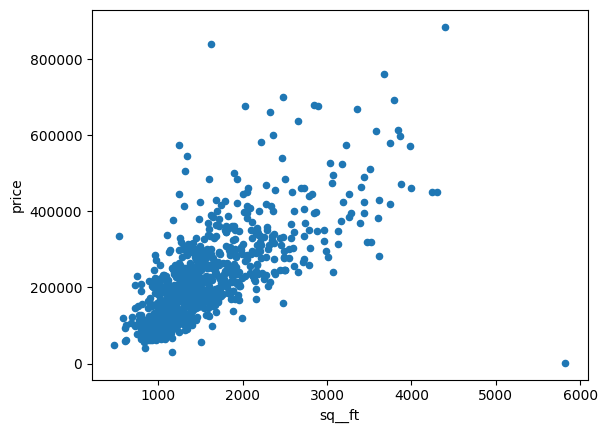

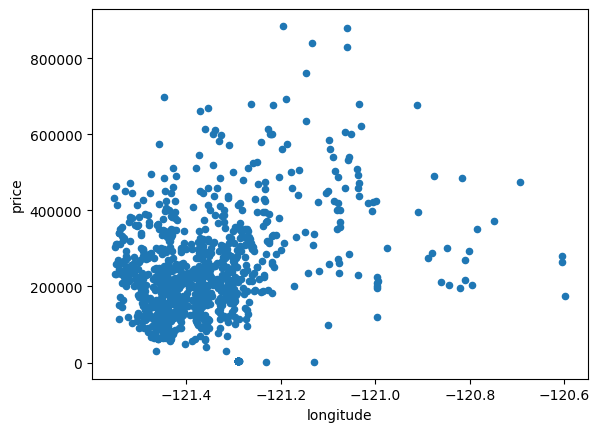

In [103]:
df_real_estate[nonzero_rows].plot.scatter('sq__ft', 'price')
plt.show()
df_real_estate.plot.scatter('longitude', 'price')
plt.show()

The results are as follows:

|            &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    | r &nbsp;&nbsp;&nbsp;&nbsp;      | p           | significant?                                                                                                                                              |
|----------------|---------|-------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| sq__ft         | 0.3339  | 4.4331e-27  | very significant, way below the threshold $\alpha$ of 0.01                                                                                                  |
| latitude       | -0.0396 | 0.2146      | not significant, over the $\alpha$                                                                                                                          |
| longitude      | 0.2845  | 8.5524e-20  | very significant, which is interesting, seems as though the<br> price increases as you go farther east                                                        |
| nonzero sq__ft | 0.6937  | 7.6705e-118 | much more significant, which makes sense. The zero<br> values aren't very helpful when talking in terms of a building's<br> square footage: there is no building! |

Here we use a Kruskal-Wallis test to determine how the prices of the different property types compare to those from other property types:

In [130]:
samples_by_group = {}
all_groups = []
for value in set(df_real_estate["type"]): 
    mask = df_real_estate["type"] == value 
    samples_by_group[value] = [] 
    mask_prices = df_real_estate["price"][mask]
    samples_by_group[value].append(mask_prices)
    all_groups.append(mask_prices)


for type in samples_by_group:
    if (not type == 'Condo'):
        stat, p = stats.kruskal(list(samples_by_group['Condo'][0]), list(samples_by_group[type][0]))
        print("Condo vs " + type + " - stat: " + str(stat) + ", p: " + str(p))


stat, p = stats.kruskal(*all_groups)
print("\nBetween All Groups - stat: " + str(stat) + ", p: " + str(p))

Condo vs Unkown - stat: 2.2862916320860167, p: 0.13052144355510706
Condo vs Multi-Family - stat: 8.698915486557196, p: 0.0031839943101083993
Condo vs Residential - stat: 29.70980281903078, p: 5.018042496053017e-08

Between All Groups - stat: 30.370833452308304, p: 1.1531292565462277e-06


The total result (p-value of 1.1531e-06), as it is well below the $\alpha=0.01$, indicates that the differences of the means between the various property types are significant, making it potentially very useful for prediction. 

Looking at it more specifically though, the only group that is significantly different than the condos' prices is the 'Residential' category:

| Condo vs:   &nbsp;&nbsp;&nbsp; | p &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | significant?                                                                                                                                     |
|--------------|------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| Residential  | 5.0180e-08 | very, this extremely low p value is way below the required<br> $\alpha$ value, being the only significant different category when<br> compared to condos |
| Multi-Family | 0.0032     | not significant, this is probably due to the lack of data points                                                                                 |
| Unknown      | 0.1305     | not significant, this is probably also due to the lack of data points                                                                            |

These results align well with my observations from the previous lab. The square footage is very closely aligned with the price, especially after filtering the 0s, and there is a significant difference in price between property types, especially between condos and residential properties.

## 4: Classification on Property Type

Here we'll run a Kruskal-Wallis test on each of the continous variables as to how they change accross property types:

In [105]:
continuous_cols = ['sq__ft', 'latitude', 'longitude', 'price']

for col in continuous_cols:
    vals_by_type = []
    for value in set(df_real_estate["type"]): 
        mask = df_real_estate["type"] == value 
        vals_by_type.append(df_real_estate[col][mask])
    stat, p = stats.kruskal(*vals_by_type)
    print(col + " for each type: p: " + str(p))

sq__ft for each type: p: 3.849635133463987e-12
latitude for each type: p: 0.4933696138791226
longitude for each type: p: 0.3574295072205312
price for each type: p: 1.1531292565462277e-06


The results were as follows:

| continuous var: | p          | significant?                                                                  |
|-----------------|------------|-------------------------------------------------------------------------------|
| sq__ft          | 3.8496e-12 | yes, way more significant than price, and under the necessary $\alpha = 0.01$ |
| latitude        | 0.4934     | nope, way over the $\alpha$                                                   |
| longitude       | 0.3574     | nope, also way over the $\alpha$                                              |
| price           | 1.1531e-06 | yes, just as in the previous part                                             |

In [107]:
df_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   street       985 non-null    object 
 1   city         985 non-null    object 
 2   zip          985 non-null    int64  
 3   state        985 non-null    object 
 4   beds         985 non-null    int64  
 5   baths        985 non-null    int64  
 6   sq__ft       985 non-null    int64  
 7   type         985 non-null    object 
 8   sale_date    985 non-null    object 
 9   price        985 non-null    int64  
 10  latitude     985 non-null    float64
 11  longitude    985 non-null    float64
 12  empty_lot    985 non-null    bool   
 13  street_type  985 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 101.1+ KB


Here we run a chi-squared test on the property type against each of the categorical variables to check for a potential relationship between the type and the other variables:

In [129]:
cat_cols = ['street', 'city', 'zip', 'beds', 'baths', 'empty_lot', 'street_type']

for col in cat_cols:
    combination_counts = df_real_estate[["type", col]].groupby(by=["type", col]).size().unstack(level=0, fill_value=0)
    chi2, p, _, _ = stats.chi2_contingency(combination_counts)
    print(col + " - chi2: " + str(chi2) + ", p: " + str(p))

street - chi2: 2954.999999999999, p: 0.41918692100156474
city - chi2: 1038.053109046946, p: 6.884142190454073e-149
zip - chi2: 300.96283941966465, p: 6.195871832483889e-06
beds - chi2: 364.92918208979756, p: 1.6090894896930032e-64
baths - chi2: 234.17409903202986, p: 2.225837221388893e-41
empty_lot - chi2: 8.39174379150273, p: 0.03857273017762252
street_type - chi2: 183.81122151019406, p: 8.981260996683352e-18


The results were as follows:

| type vs:   &nbsp;&nbsp;&nbsp;&nbsp; | p   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | significant?                                                                                                                                                    |
|-------------|------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| street      | 0.4192     | nope, the proportions were not dissimilar<br> enough to produce a p value lower than the necessary $\alpha = 0.01$                                                  |
| city        | 6.884e-149 | very much so, weirdly enough                                                                                                                                    |
| zip         | 6.196e-06  | interestingly, this was significant as it <br>pertains to property type                                                                                             |
| beds        | 1.609e-64  | definitely, this was much smaller than the<br> necessary $\alpha$, which expectedly means that different types <br>of proporties usually have different numbers of beds |
| baths       | 2.226e-41  | same story as the number of beds                                                                                                                                |
| empty_lot   | 0.0386     | nope, this p-value was low, but not low enough                                                                                                                  |
| street_type | 8.981e-18  | very significant, turns out different property types tend to show <br>up on different streeets                                                                      |

These results are much more definitive than the ones from lab2, which involved looking at heat maps with really only the 'residential' type. I was incorrect for a few of them, but it was very muddy and subjective, so I'm not too torn up about it. Specifically, I was wrong about city and zip code. It turns out certain zip codes do have different distributions of property types.